# Labels (genres) EDA

In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/vera/Documents/master tue/data literacy/project/data/dataset.csv')
print(df)


       Unnamed: 0   wiki_id     frbs_id  \
0               0       620     /m/0hhy   
1               1       843     /m/0k36   
2               2       986     /m/0ldx   
3               3      1756     /m/0sww   
4               4      2080     /m/0wkt   
...           ...       ...         ...   
16554       16554  36934824  /m/0m0p0hr   
16555       16555  37054020  /m/04f1nbs   
16556       16556  37122323  /m/0n5236t   
16557       16557  37132319  /m/0n4bqb1   
16558       16558  37159503   /m/073nkd   

                                                    name              author  \
0                                            Animal Farm       George Orwell   
1                                     A Clockwork Orange     Anthony Burgess   
2                                             The Plague        Albert Camus   
3              An Enquiry Concerning Human Understanding          David Hume   
4                                   A Fire Upon the Deep        Vernor Vinge   
...

In [3]:
genres = df['genres'].copy()
print(genres)

0        ['Roman à clef', 'Satire', "Children's literat...
1        ['Science Fiction', 'Novella', 'Speculative fi...
2        ['Existentialism', 'Fiction', 'Absurdist ficti...
3                                                       []
4        ['Hard science fiction', 'Science Fiction', 'S...
                               ...                        
16554                                                   []
16555                              ['Thriller', 'Fiction']
16556                                    ['Autobiography']
16557                                                   []
16558          ['Epistolary novel', 'Speculative fiction']
Name: genres, Length: 16559, dtype: object


In [4]:
genres[genres==genres[3]]

3        []
7        []
10       []
11       []
12       []
         ..
16550    []
16552    []
16553    []
16554    []
16557    []
Name: genres, Length: 3718, dtype: object

In [5]:
print('There are ', str(len(genres[genres==genres[3]])), 'unlabeled books.')

There are  3718 unlabeled books.


In [6]:
# genres of each book are represented as a string representation of list, so it needs to be converted to list
unique_genres_unfiltered = set()
for index, value in genres.items():
    genres_lowercase = [genre.lower() for genre in ast.literal_eval(value)]
    genres[index] = genres_lowercase
    unique_genres_unfiltered.update(genres_lowercase)

In [7]:
print('There are ', str(len(unique_genres_unfiltered)), 'book genres in the data set.')

There are  227 book genres in the data set.


In [8]:
# Counting the number of books of each genre
def GetGenresFrequencies(unique_genres, genres):
    """
    Input: 
        unique_genres: list/set of the possible genres
        genres: lebels(genres) of the books in the data set
    
    Output: Sorted dictionary of the book genres(keys) and their frequencies(values) in the data set
    """
    genre_freq= {}
    for genre in unique_genres:
        for index, genres_list in genres.items():
            genre_count = genres_list.count(genre)
            if genre not in genre_freq:
                genre_freq[genre] = genre_count
            else:
                genre_freq[genre] = genre_freq.get(genre) + genre_count  
                
    # Sort the frequency of the genres dictionart, such that most frequent ones appear first
    genre_freq_sorted = dict(sorted(genre_freq.items(), key=lambda item: item[1], reverse=True))

    return genre_freq_sorted

In [9]:
genre_freq_unfiltered = GetGenresFrequencies(unique_genres_unfiltered, genres)
print(genre_freq_unfiltered)

{'fiction': 4747, 'speculative fiction': 4314, 'science fiction': 2870, 'novel': 2463, 'fantasy': 2413, "children's literature": 2122, 'mystery': 1396, 'young adult literature': 825, 'suspense': 765, 'crime fiction': 753, 'historical novel': 654, 'thriller': 568, 'horror': 511, 'romance novel': 435, 'historical fiction': 388, 'detective fiction': 341, 'adventure novel': 330, 'non-fiction': 230, 'alternate history': 226, 'spy fiction': 190, 'comedy': 145, 'dystopia': 127, 'autobiography': 124, 'satire': 123, 'gothic fiction': 112, 'comic novel': 104, 'biography': 102, 'novella': 87, 'war novel': 87, 'short story': 78, 'autobiographical novel': 77, 'history': 73, 'memoir': 67, 'utopian and dystopian fiction': 67, 'high fantasy': 66, 'humour': 62, 'techno-thriller': 59, 'apocalyptic and post-apocalyptic fiction': 56, 'picture book': 49, 'role-playing game': 48, 'philosophy': 47, 'steampunk': 47, 'paranormal romance': 46, 'bildungsroman': 42, 'western': 41, 'gamebook': 39, 'black comedy': 

In [10]:
def PrintBooksOfCertainGenre(genre):
    """
    Input: genre: type - string, specifies the genre for the book query
    """
    for index, genres_list in genres.items():
        if genres_list.count(genre)>0:
            print(df.loc[df.index[index], 'name'])

In [11]:
def PrintAllGenresOfBookWihCertainGenre(genre):
    """
    Input: genre - type:string, specifies the genre for the book query
    """
    for index, genres_list in genres.items():
        if genres_list.count(genre)>0:
            print(df.loc[df.index[index], ['name', 'genres']])

# Cleaning the data

## Dropping books without labels

In [12]:
df.drop(labels=list(df)[0],axis=1, inplace = True)

In [13]:
df

,wiki_id,frbs_id,name,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"['Roman à clef', 'Satire', ""Children's literat...","Old Major, the old boar on the Manor Farm, cal..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"['Science Fiction', 'Novella', 'Speculative fi...","Alex, a teenager living in near-future England..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"['Existentialism', 'Fiction', 'Absurdist ficti...",The text of The Plague is divided into five pa...
3,1756,/m/0sww,An Enquiry Concerning Human Understanding,David Hume,NaN,[],The argument of the Enquiry proceeds by a seri...
4,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"['Hard science fiction', 'Science Fiction', 'S...",The novel posits that space around the Milky W...
...,...,...,...,...,...,...,...
16554,36934824,/m/0m0p0hr,Under Wildwood,Colin Meloy,2012-09-25,[],"Prue McKeel, having rescued her brother from t..."
16555,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"['Thriller', 'Fiction']",The reader first meets Rapp while he is doing ...
16556,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,['Autobiography'],The book follows very rough chronological orde...
16557,37132319,/m/0n4bqb1,America Again: Re-becoming The Greatness We Ne...,Stephen Colbert,2012-10-02,[],Colbert addresses topics including Wall Street...


In [14]:
# Set all lebels in the dataframe to the lowercase
for index in df.index:
    genres_lowercase = [genre.lower() for genre in ast.literal_eval(df.at[index,'genres'])]
    df.at[index,'genres'] = genres_lowercase

In [15]:
# Drop books that are not labeled
df = df[df['genres'].map(lambda d: len(d)) > 0]
df.reset_index(drop=True, inplace=True)

In [16]:
df

,wiki_id,frbs_id,name,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"[roman à clef, satire, children's literature, ...","Old Major, the old boar on the Manor Farm, cal..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[science fiction, novella, speculative fiction...","Alex, a teenager living in near-future England..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"[existentialism, fiction, absurdist fiction, n...",The text of The Plague is divided into five pa...
3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"[hard science fiction, science fiction, specul...",The novel posits that space around the Milky W...
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[war novel, roman à clef]","The book tells the story of Paul Bäumer, a Ger..."
...,...,...,...,...,...,...,...
12836,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,[science fiction],"The story starts with former government agent,..."
12837,36534061,/m/072y44,Remote Control,Andy McNab,1997,"[thriller, fiction, suspense]",The series follows the character of Nick Stone...
12838,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"[thriller, fiction]",The reader first meets Rapp while he is doing ...
12839,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,[autobiography],The book follows very rough chronological orde...


## Label filtering and mapping 

The most unfrequent and the broadest genres (which would make the data set extremely imbalanced) are dropped, and the rest are grouped around the broader genres.

In [17]:
genre_mapping = {
                 'science fiction':'science fiction',
                 'dystopia':'science fiction', 
                 'apocalyptic and post-apocalyptic fiction':'science fiction',
                 'steampunk':'science fiction',
                 'feminist science fiction':'science fiction',
                 'cyberpunk':'science fiction',
                 'military science fiction':'science fiction',
                 'time travel':'science fiction',
                 'hard science fiction':'science fiction',
                
                 'fantasy':'fantasy',
                 'high fantasy':'fantasy',
                 #'speculative fiction':'fantasy',
                 'urban fantasy':'fantasy',
                 'fantasy of manners':'fantasy',
                 'contemporary fantasy':'fantasy',
                 'fairy tale':'fantasy',
                 'science fantasy':'fantasy',
                 'lost world':'fantasy',
                 'historical fantasy':'fantasy',
                 'sword and sorcery':'fantasy',
                 'dark fantasy':'fantasy',
                 
                 'mystery':'mystery',
                 
                 'thriller':'thriller',
                 'suspense':'thriller',
                 'techno-triller':'thriller',
                 
                 'true crime':'crime',
                 'crime fiction':'crime',
                 'detective fiction':'crime',
                 'spy fiction':'crime', 
                 'historical whodunnit':'crime',
                 'whodunit':'crime',
                 'hardboiled':'crime',
                 
                 'historical novel':'historical', 
                 'historical fiction':'historical',
                 'war novel':'historical',
                 'post-holocaust':'historical',
                 'wuxia':'historical',
                 
                 'horror':'horror',
                 'gothic fiction':'horror', 
                 'vampire fiction':'horror',
                 
                 'romance novel':'romance', 
                 'paranormal romance':'romance',
                 'historical romance':'romance',
                 'regency romance':'romance',
                 'scientific romance':'romance', 
                 'chivalric romance':'romance',
                 
                 'adventure':'adventure',
                 'adventure novel':'adventure',
                 
                 'non-fiction':'non-fiction',
                 'biography':'non-fiction', 
                 'autobiography':'non-fiction',
                 'philosophy':'non-fiction',
                 'personal journal':'non-fiction',
                 'sports, Popular science':'non-fiction',
                 'travel literature':'non-fiction',
                 'mathematics':'non-fiction',
                 'economics':'non-fiction',
                 'politics':'non-fiction', 
                 'business':'non-fiction',
                 'sociology':'non-fiction',
                 'psychology':'non-fiction',
                 'travel':'non-fiction',
                 'psychology':'non-fiction',
                 'science':'non-fiction',
                 
                 'comedy':'humor',
                 'tragicomedy':'humor',
                 'satire':'humor',
                 'comic novel':'humor',
                 'black comedy':'humor',
                 'comics':'humor',
                 'comic science fiction':'humor', 
                 'parody':'humor',
                 
                 'novel':'realistic fiction',
                 'literary realism':'realistic fiction',
                 'industrial novel':'realistic fiction',
                 'social novel':'realistic fiction',
                 'psychological novel':'realistic fiction',
                 'roman à clef':'realistic fiction',
                 
                 'western':'western',
                 'western fiction': 'western',
                 
                 'bildungsroman':'coming of age', 
                 'künstlerroman':'coming of age',
                 
                 "children's literature":"children's literature"
                
                }

In [18]:
for index, value in df['genres'].items():
    l_new = list()
    for elem in value:
        l_new.append(genre_mapping.get(elem))
    df.at[index,'genres'] = l_new

In [19]:
df

,wiki_id,frbs_id,name,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"[realistic fiction, humor, children's literatu...","Old Major, the old boar on the Manor Farm, cal..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[science fiction, None, None, None, humor, None]","Alex, a teenager living in near-future England..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,"[None, None, None, realistic fiction]",The text of The Plague is divided into five pa...
3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"[science fiction, science fiction, None, fanta...",The novel posits that space around the Milky W...
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[historical, realistic fiction]","The book tells the story of Paul Bäumer, a Ger..."
...,...,...,...,...,...,...,...
12836,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,[science fiction],"The story starts with former government agent,..."
12837,36534061,/m/072y44,Remote Control,Andy McNab,1997,"[thriller, None, thriller]",The series follows the character of Nick Stone...
12838,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,"[thriller, None]",The reader first meets Rapp while he is doing ...
12839,37122323,/m/0n5236t,Decoded,Jay-Z,2010-11-16,[non-fiction],The book follows very rough chronological orde...


In [20]:
# Cleaning None values in the genre lists
for idx, gnr in df['genres'].items():
    df.at[idx,'genres'] = [i for i in gnr if i is not None]

df = df[df['genres'].map(lambda d: len(d)) > 0]
df.reset_index(drop=True, inplace=True)

In [21]:
df

,wiki_id,frbs_id,name,author,date,genres,summary
0,620,/m/0hhy,Animal Farm,George Orwell,1945-08-17,"[realistic fiction, humor, children's literature]","Old Major, the old boar on the Manor Farm, cal..."
1,843,/m/0k36,A Clockwork Orange,Anthony Burgess,1962,"[science fiction, humor]","Alex, a teenager living in near-future England..."
2,986,/m/0ldx,The Plague,Albert Camus,1947,[realistic fiction],The text of The Plague is divided into five pa...
3,2080,/m/0wkt,A Fire Upon the Deep,Vernor Vinge,NaN,"[science fiction, science fiction, fantasy]",The novel posits that space around the Milky W...
4,2152,/m/0x5g,All Quiet on the Western Front,Erich Maria Remarque,1929-01-29,"[historical, realistic fiction]","The book tells the story of Paul Bäumer, a Ger..."
...,...,...,...,...,...,...,...
11401,36126792,/m/044psh,Gates of Paradise,V. C. Andrews,1989-06,[horror],"A novel about Annie Stonewall, the daughter of..."
11402,36372465,/m/02vqwsp,The Third Lynx,Timothy Zahn,2007,[science fiction],"The story starts with former government agent,..."
11403,36534061,/m/072y44,Remote Control,Andy McNab,1997,"[thriller, thriller]",The series follows the character of Nick Stone...
11404,37054020,/m/04f1nbs,Transfer of Power,Vince Flynn,2000-06-01,[thriller],The reader first meets Rapp while he is doing ...


In [22]:
unique_genres = set()
for index, value in df['genres'].items():
    unique_genres.update(value)
print('There are ', str(len(unique_genres)), 'book genres in the data set.')

There are  15 book genres in the data set.


In [23]:
genre_freq = GetGenresFrequencies(unique_genres, df['genres'])
print(genre_freq)

{'science fiction': 3201, 'fantasy': 2635, 'realistic fiction': 2536, "children's literature": 2122, 'mystery': 1396, 'crime': 1367, 'thriller': 1333, 'historical': 1153, 'non-fiction': 670, 'horror': 638, 'romance': 526, 'humor': 447, 'adventure': 353, 'western': 64, 'coming of age': 54}


## Visualisations

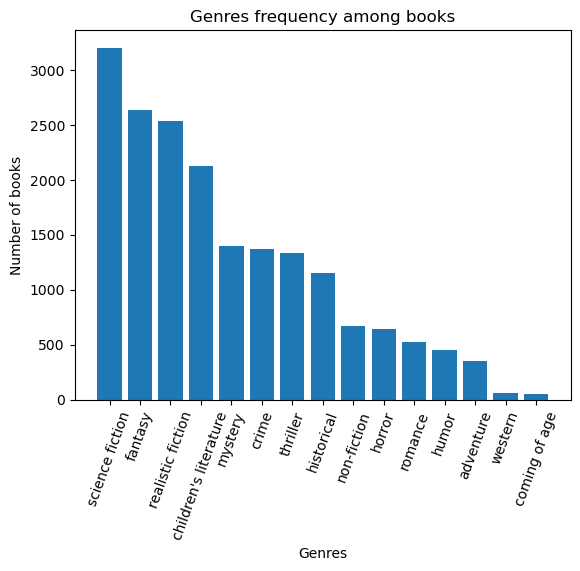

In [24]:
plt.bar(range(len(genre_freq)), list(genre_freq.values()), align='center')
plt.xticks(range(len(genre_freq)), list(genre_freq.keys()))
plt.xticks(rotation=70)
plt.title('Genres frequency among books')
plt.xlabel('Genres')
plt.ylabel('Number of books')
plt.show()

**Conclusion**: The dataset is rather imbalanced, which should be taken into account when implementing the models.